In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from keras.datasets import fashion_mnist
import numpy as np
from matplotlib import pyplot as plt
from data_augmentation import data_augmentation
from metrics import plot_ROC_curve, plot_confusion_matrix
from models import create_mlp_model, plot_accuracy, plot_loss
from tensorflow import keras

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Sparse arrays

In [5]:
y_sparse_train = np.zeros([len(y_train),10])
y_sparse_test = np.zeros([len(y_test),10])

In [6]:
for idx in range(len(y_train)):
    y_sparse_train[idx,y_train[idx]] = 1

for idx in range(len(y_test)):
    y_sparse_test[idx,y_test[idx]] = 1

## Models

In [7]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.optimizers import Adam, RMSprop, SGD, Adagrad, Adadelta, Adamax, Nadam
from keras.models import Sequential
from keras.utils import plot_model
from keras.initializers import GlorotUniform, GlorotNormal, RandomNormal
from keras.backend import clear_session
from keras.models import clone_model

### Softmax Regression

In [8]:
model_1 = Sequential()

In [9]:
model_1.add(Flatten(input_shape=(28,28)))

In [10]:
model_1.add(BatchNormalization())

In [11]:
model_1.add(Dense(256, activation="relu"))

In [12]:
model_1.add(Dropout(0.125))

In [13]:
model_1.add(Dense(128, activation="relu"))

In [14]:
model_1.add(Dense(10, activation="softmax"))

In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                        

In [16]:
model_1.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

### Train

In [17]:
model_2 = clone_model(model_1)

In [18]:
model_2.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [19]:
history_2 = model_2.fit(x=X_train, y=y_sparse_train, validation_data=(X_test, y_sparse_test), batch_size=128, epochs=20)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4693 - accuracy: 0.8318 - val_loss: 0.4124 - val_accuracy: 0.8474
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3472 - accuracy: 0.8730 - val_loss: 0.3611 - val_accuracy: 0.8663
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3087 - accuracy: 0.8856 - val_loss: 0.3388 - val_accuracy: 0.8761
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2829 - accuracy: 0.8948 - val_loss: 0.3237 - val_accuracy: 0.8850
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2676 - accuracy: 0.8996 - val_loss: 0.3378 - val_accuracy: 0.8788
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2475 - accuracy: 0.9070 - val_loss: 0.3106 - val_accuracy: 0.8880
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2334 - accuracy: 0.9125 - val_loss: 0.3242 - val_accuracy: 0.8860
Epoch 

In [20]:
# Get weights from model 1 and model 2
weights_1 = model_1.get_weights()
weights_2 = model_2.get_weights()

# Get the difference between the weights
weights_diff = []

for idx in range(len(weights_1)):
    weights_diff.append(weights_1[idx] - weights_2[idx])

# Get the 50% of the weights that changed the most from each layer
weights_3 = []

for idx in range(len(weights_diff)):
    weights_3.append(np.where(weights_diff[idx] > np.percentile(weights_diff[idx], 50), weights_2[idx], 0))

# Create model 3 with the weights that changed the most
model_3 = clone_model(model_1)

model_3.set_weights(weights_3)

model_3.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [21]:
score_3 = model_3.evaluate(X_test, y_sparse_test, verbose=0)
print('Test accuracy for model 3:', score_3[1])

Test accuracy for model 3: 0.11339999735355377


In [22]:
# Train model 3
history_3 = model_3.fit(x=X_train, y=y_sparse_train, validation_data=(X_test, y_sparse_test), batch_size=128, epochs=20)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.7692 - accuracy: 0.7107 - val_loss: 0.4438 - val_accuracy: 0.8368
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3815 - accuracy: 0.8599 - val_loss: 0.3651 - val_accuracy: 0.8656
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3234 - accuracy: 0.8800 - val_loss: 0.3488 - val_accuracy: 0.8740
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2936 - accuracy: 0.8900 - val_loss: 0.3298 - val_accuracy: 0.8811
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2732 - accuracy: 0.8974 - val_loss: 0.3255 - val_accuracy: 0.8815
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2530 - accuracy: 0.9043 - val_loss: 0.3165 - val_accuracy: 0.8856
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2402 - accuracy: 0.9090 - val_loss: 0.3159 - val_accuracy: 0.8887
Epoch 

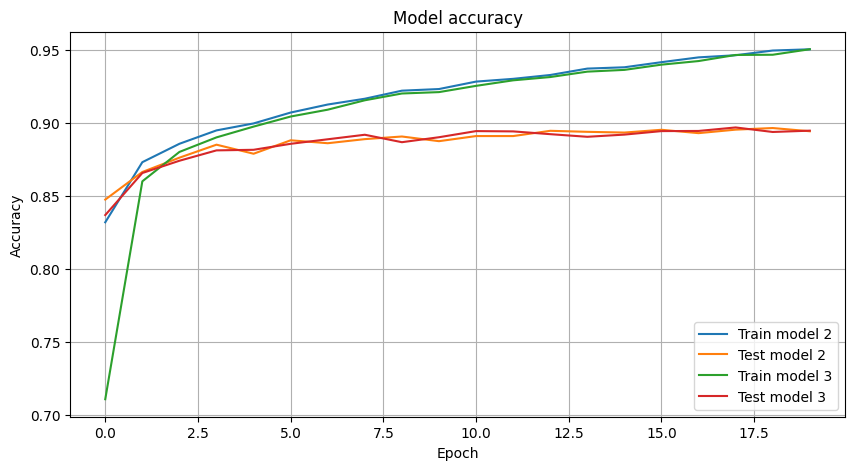

In [25]:
# Plot accuracy
plt.figure(figsize=(10,5))
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train model 2', 'Test model 2', 'Train model 3', 'Test model 3'], loc='lower right')
plt.grid()
plt.show()